# Linear Regression

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn import metrics

In [23]:
# Load the Boston Housing dataset from a URL
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

## Pre Processing

In [24]:
# Find and remove outliers using Z-score
def remove_outliers_zscore(data, threshold=3):
    z_scores = np.abs(zscore(data))
    return data[(z_scores < threshold).all(axis=1)]

In [25]:
df_cleaned = remove_outliers_zscore(df)
df_cleaned

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [26]:
# Separate dependent and independent variables
X = df_cleaned.drop(columns=['medv'])  # Independent variables
y = df_cleaned['medv']                 # Dependent variable

In [27]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Perform Z-score normalization on train and test features separately
features_group1 = ['b', 'crim', 'zn', 'tax']
X_train[features_group1] = X_train[features_group1].apply(zscore)
X_test[features_group1] = X_test[features_group1].apply(zscore)

In [29]:
features_group2 = ['lstat', 'age', 'dis', 'rad']
X_train[features_group2] = X_train[features_group2].apply(zscore)
X_test[features_group2] = X_test[features_group2].apply(zscore)

In [30]:
# Perform Min-Max normalization on train and test features separately
scaler = MinMaxScaler()
features_group3 = ['indus', 'chas', 'nox', 'rm', 'ptratio']
X_train[features_group3] = scaler.fit_transform(X_train[features_group3])
X_test[features_group3] = scaler.transform(X_test[features_group3])

## Modelin

In [31]:
# Train a Linear Regression model with the normalized data
model_norm = LinearRegression()
model_norm.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred_norm = model_norm.predict(X_test)

In [38]:
mae_norm = metrics.mean_absolute_error(y_test, y_pred_norm)
mse_norm = metrics.mean_squared_error(y_test, y_pred_norm)
rmse_norm = np.sqrt(metrics.mean_squared_error(y_test, y_pred_norm))
r2_norm = metrics.r2_score(y_test, y_pred_norm)

In [39]:
#compairing predicted valiues with the actual values by metricses
print("Mean Absolute Error: ", mae_norm)
print("Mean Squared Error: ", mse_norm)
print("Root Mean Squared Error: ", rmse_norm)
print("R2 Score: ", r2_norm)

Mean Absolute Error:  2.519472511181255
Mean Squared Error:  10.774496040294853
Root Mean Squared Error:  3.282452747610368
R2 Score:  0.7728912495887248


In [40]:
# Train a Linear Regression model with the non-normal data
X_train_non_norm, X_test_non_norm, y_train_non_norm, y_test_non_norm = train_test_split(X, y, test_size=0.2, random_state=42)
model_non_norm = LinearRegression()
model_non_norm.fit(X_train_non_norm, y_train_non_norm)

LinearRegression()

In [41]:
y_pred_non_norm = model_non_norm.predict(X_test_non_norm)

In [44]:
mae_non_norm = metrics.mean_absolute_error(y_test_non_norm, y_pred_non_norm)
mse_non_norm = metrics.mean_squared_error(y_test_non_norm, y_pred_non_norm)
rmse_non_norm = np.sqrt(metrics.mean_squared_error(y_test_non_norm, y_pred_non_norm))
r2_non_norm = metrics.r2_score(y_test_non_norm, y_pred_non_norm)

In [45]:
# compairing predicted valiues with the actual values by metricses
print("Mean Absolute Error: ", mae_non_norm)
print("Mean Squared Error: ", mse_non_norm)
print("Root Mean Squared Error: ", rmse_non_norm)
print("R2 Score: ", r2_non_norm)

Mean Absolute Error:  2.494487367576256
Mean Squared Error:  10.621445730673006
Root Mean Squared Error:  3.259055956971743
R2 Score:  0.7761172997388464


In [46]:
metrics = pd.DataFrame({
    'Model': ['Normalized Data', 'Non-Normalized Data'],
    'MAE': [mae_norm, mae_non_norm],
    'MSE': [mse_norm, mse_non_norm],
    'RMSE': [rmse_norm, rmse_non_norm],
    'R2 Score': [r2_norm, r2_non_norm]
})

## Comparison

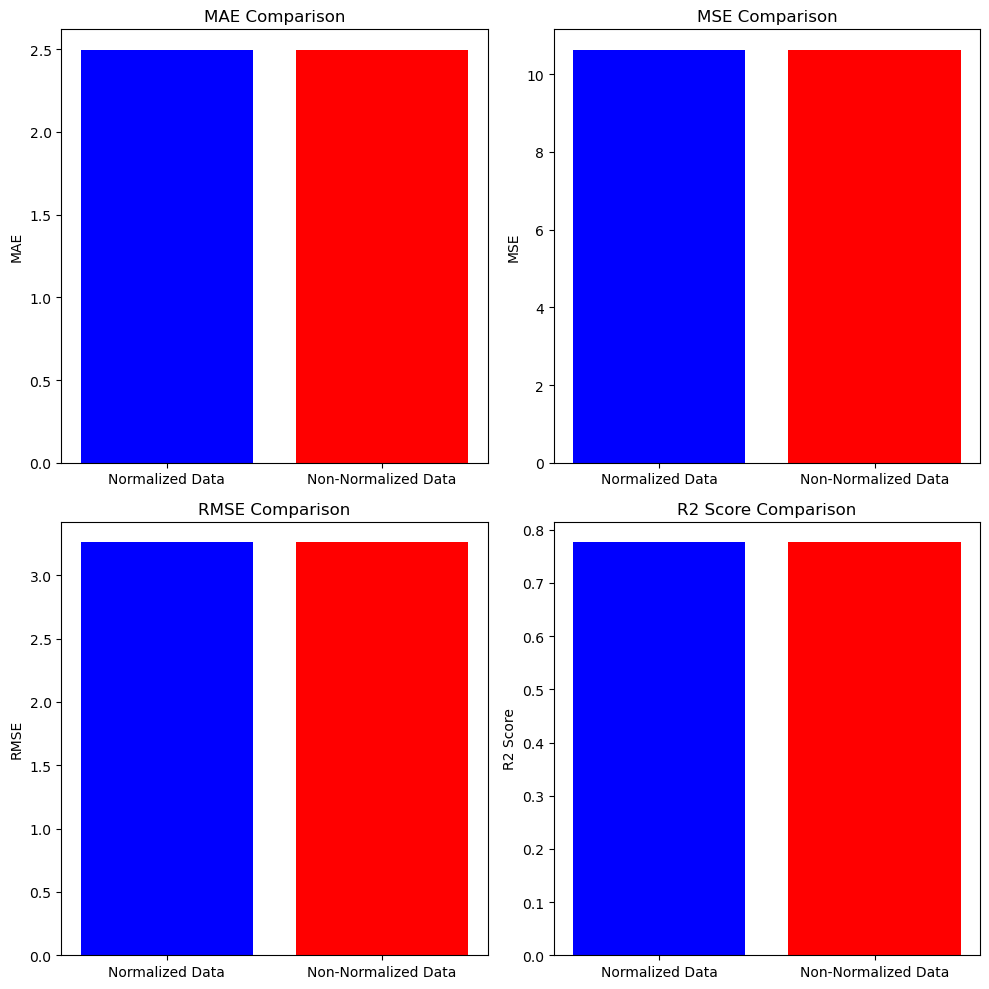

In [50]:
# Plot comparison
plt.figure(figsize=(10, 10))  # Adjust the figure size for better visualization

# MAE Score Plot
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st position
plt.bar(metrics['Model'], metrics['MAE'], color=['blue', 'red'])
plt.title('MAE Comparison')
plt.ylabel('MAE')

# MSE Score Plot
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd position
plt.bar(metrics['Model'], metrics['MSE'], color=['blue', 'red'])
plt.title('MSE Comparison')
plt.ylabel('MSE')

# RMSE Plot
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, 3rd position
plt.bar(metrics['Model'], metrics['RMSE'], color=['blue', 'red'])
plt.title('RMSE Comparison')
plt.ylabel('RMSE')

# R2 Score Plot
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, 4th position
plt.bar(metrics['Model'], metrics['R2 Score'], color=['blue', 'red'])
plt.title('R2 Score Comparison')
plt.ylabel('R2 Score')

plt.tight_layout()  # Automatically adjust subplots for a neat layout
plt.show()


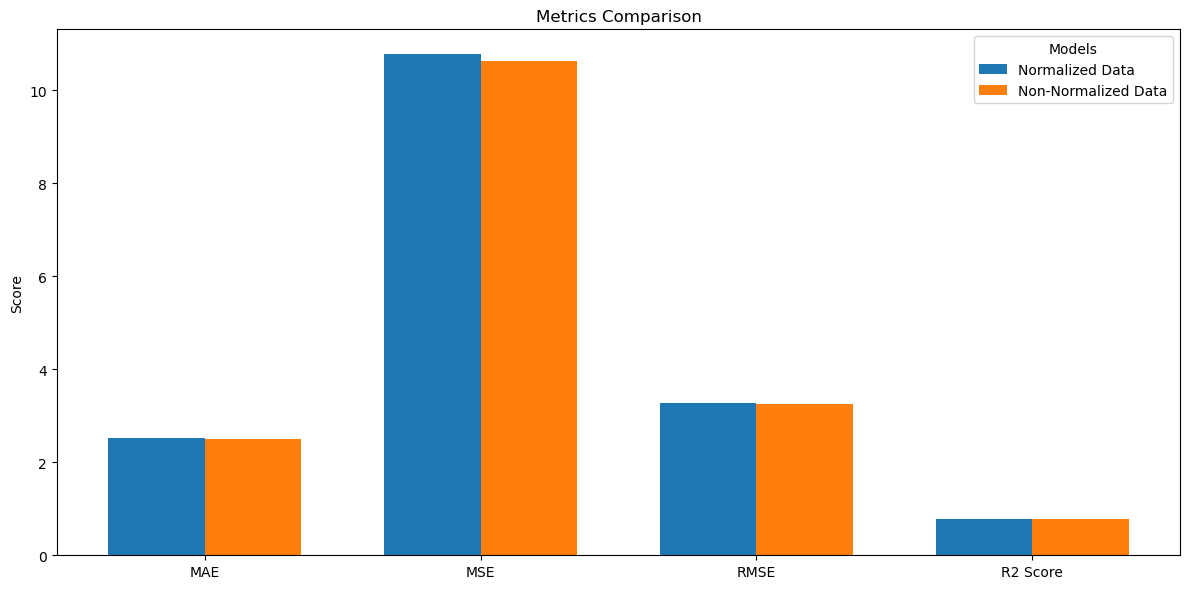

In [52]:
import numpy as np

# Example metrics data
metrics = {
    'Model': ['Normalized Data', 'Non-Normalized Data'],
    'MAE': [2.519, 2.494],
    'MSE': [10.774, 10.621],
    'RMSE': [3.282, 3.259],
    'R2 Score': [0.772, 0.776]
}

# Convert to arrays for easier plotting
models = metrics['Model']
categories = ['MAE', 'MSE', 'RMSE', 'R2 Score']
values = [metrics[category] for category in categories]

x = np.arange(len(categories))  # Label locations
width = 0.35  # Width of bars

# Plotting grouped bar plot
plt.figure(figsize=(12, 6))

for i, model in enumerate(models):
    plt.bar(x + i * width, [metrics[cat][i] for cat in categories], width, label=model)

plt.xticks(x + width / 2, categories)
plt.ylabel('Score')
plt.title('Metrics Comparison')
plt.legend(title='Models')
plt.tight_layout()
plt.show()
